In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Pavly/Downloads/archive/Employee.csv')
print(data.head(10))

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   
5  Bachelors         2016  Bangalore            3   22    Male          No   
6  Bachelors         2015  New Delhi            3   38    Male          No   
7  Bachelors         2016  Bangalore            3   34  Female          No   
8  Bachelors         2016       Pune            3   23    Male          No   
9    Masters         2017  New Delhi            2   37    Male          No   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2           

In [3]:
print(data.isna().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [4]:
print(data.isnull().sum()) #or You can use any()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [5]:
data.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(1889)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
new_data = data.drop_duplicates()
new_data.shape

(2764, 9)

In [10]:
new_data["Education"].value_counts()

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

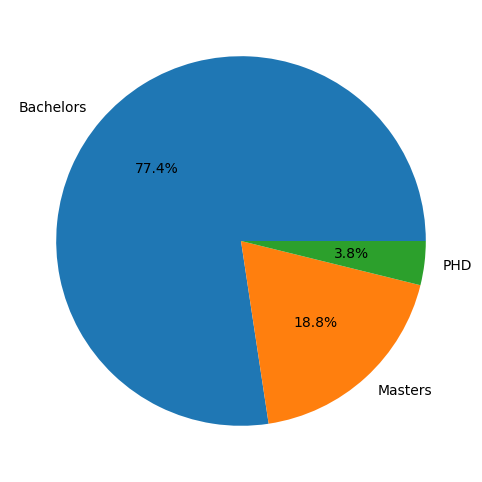

In [11]:
edu_count=data.Education.value_counts()
plt.figure(figsize=(8,6))
plt.pie(edu_count,labels=edu_count.index,autopct='%1.1f%%')
plt.show()


In [12]:
data.JoiningYear.value_counts()

JoiningYear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64

C:\Users\Pavly\AppData\Local\Temp\ipykernel_7992\3079494242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='JoiningYear', palette=colors)


<Axes: xlabel='JoiningYear', ylabel='count'>

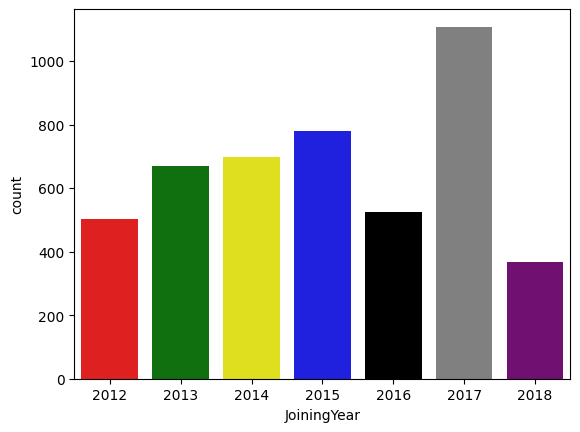

In [13]:
colors = ['red', 'green', 'yellow', 'blue', 'black', 'grey', 'purple']
sns.countplot(data=data, x='JoiningYear', palette=colors)


In [14]:
pd.crosstab(data.JoiningYear,data.City,values=data.Age,aggfunc='median')

City,Bangalore,New Delhi,Pune
JoiningYear,,,
2012,28.0,28.0,27.0
2013,27.5,27.0,27.5
2014,28.0,28.0,28.0
2015,28.0,28.0,28.0
2016,28.0,28.0,28.0
2017,28.0,28.0,28.0
2018,28.0,28.0,28.0


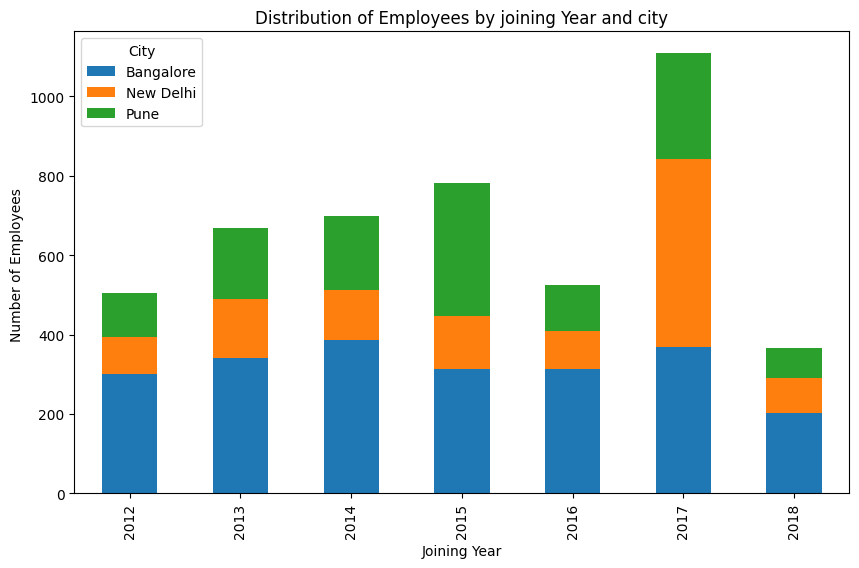

In [15]:
city_joinyear = data.groupby(['JoiningYear', 'City']).size().unstack()
ax = city_joinyear.plot(kind='bar',stacked=True,figsize=(10,6))

plt.xlabel('Joining Year')
plt.ylabel('Number of Employees ')
plt.title('Distribution of Employees by joining Year and city')

plt.legend(title="City",loc="upper left")
plt.show()

In [16]:
pd.crosstab(data.Gender,data.Education)

Education,Bachelors,Masters,PHD
Gender,,,
Female,1435,371,69
Male,2166,502,110


In [17]:
pivot_table = pd.crosstab(data['Gender'],data['Education'],values=data["Age"],aggfunc=['median','min','max'])
pivot_table = pivot_table.reset_index()
pivot_table

Gender    median                     min                   max  \
Education         Bachelors Masters   PHD Bachelors Masters PHD Bachelors   
0          Female      28.0    28.0  28.0        22      22  22        41   
1            Male      28.0    28.0  27.0        22      22  22        41   

                       
Education Masters PHD  
0              41  40  
1              41  41

<Axes: xlabel='Education', ylabel='count'>

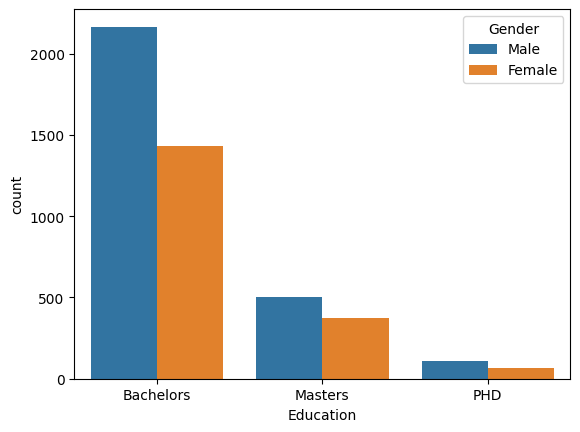

In [18]:
sns.countplot(data=data,x=data.Education,hue='Gender')

In [20]:
pd.crosstab(data.PaymentTier,data.Gender)

Gender,Female,Male
PaymentTier,,
1,131,112
2,605,313
3,1139,2353


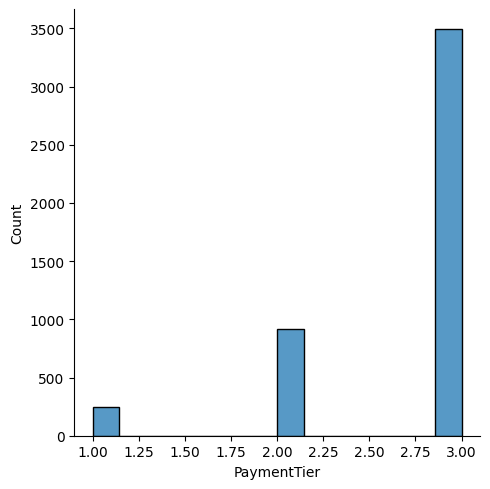

In [21]:
sns.displot(data["PaymentTier"])

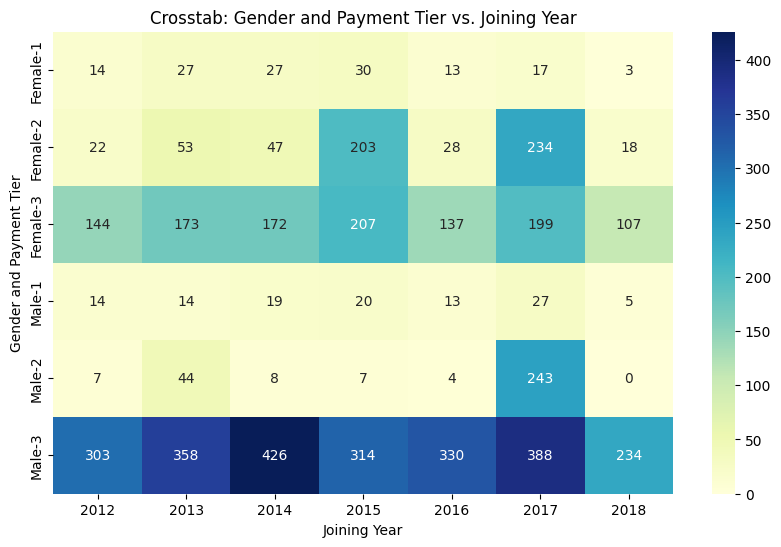

In [28]:
x=pd.crosstab([data.Gender,data.PaymentTier],data.JoiningYear)
plt.figure(figsize=(10,6))
sns.heatmap(x, annot=True,fmt='d',cmap="YlGnBu")
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

In [29]:
data.EverBenched.value_counts()

EverBenched
No     4175
Yes     478
Name: count, dtype: int64

In [30]:
pd.crosstab(data.Gender,data.EverBenched)

EverBenched,No,Yes
Gender,,
Female,1696,179
Male,2479,299


<Axes: xlabel='EverBenched', ylabel='count'>

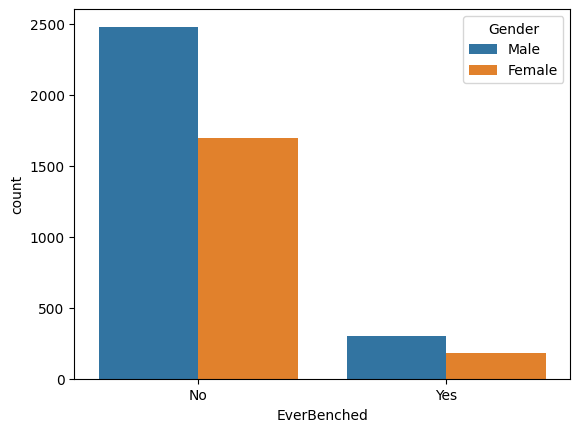

In [32]:
sns.countplot(data=data,x='EverBenched',hue='Gender')


<Figure size 1200x800 with 0 Axes>

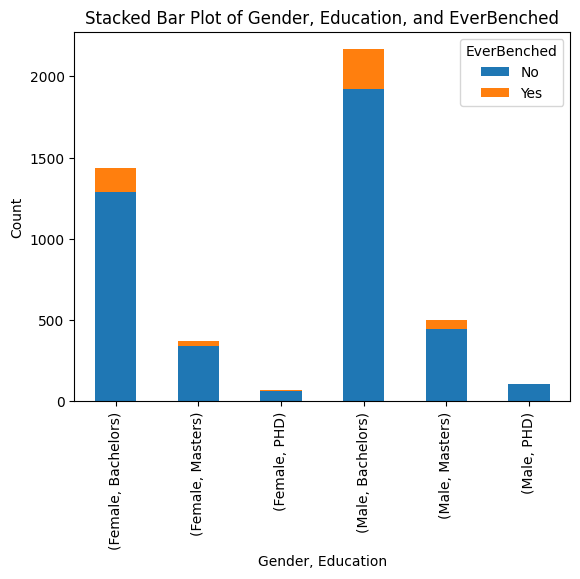

In [33]:
x = pd.crosstab([data['Gender'], data['Education']], data['EverBenched'])

plt.figure(figsize=(12, 8))

x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, Education, and EverBenched')
plt.xlabel('Gender, Education')
plt.ylabel('Count')

# Show the plot
plt.show()

In [34]:
pd.crosstab(data.ExperienceInCurrentDomain,data.Gender)


Gender,Female,Male
ExperienceInCurrentDomain,,
0,142,213
1,227,331
2,447,640
3,321,465
4,367,564
5,365,554
6,2,6
7,4,5


<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

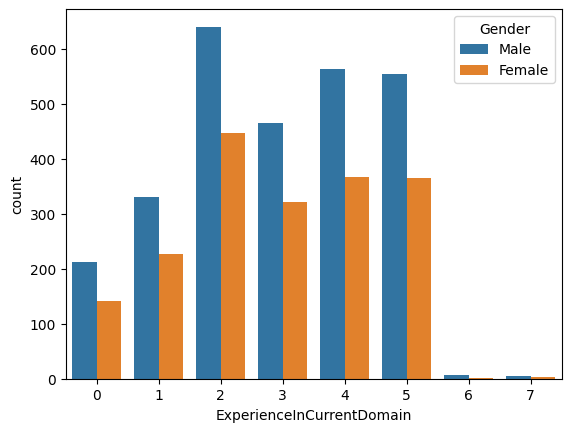

In [36]:
sns.countplot(data=data,x='ExperienceInCurrentDomain',hue="Gender")

In [37]:
data.ExperienceInCurrentDomain.value_counts()

ExperienceInCurrentDomain
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: count, dtype: int64

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

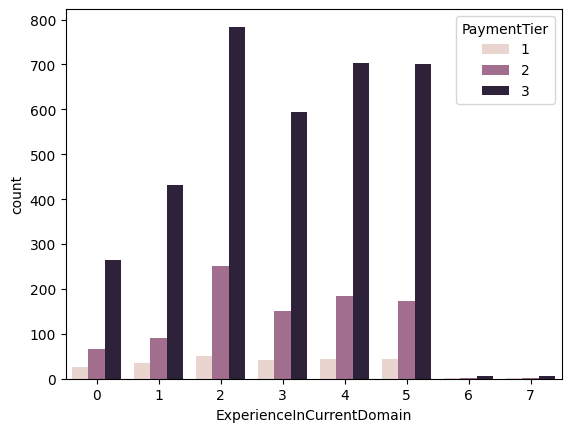

In [38]:
sns.countplot(data=data,x='ExperienceInCurrentDomain',hue="PaymentTier")

In [39]:
data.LeaveOrNot.value_counts()


LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [40]:
pd.crosstab([data.Gender,data.EverBenched],data.LeaveOrNot)

LeaveOrNot             0    1
Gender EverBenched           
Female No            920  776
       Yes            71  108
Male   No           1872  607
       Yes           190  109

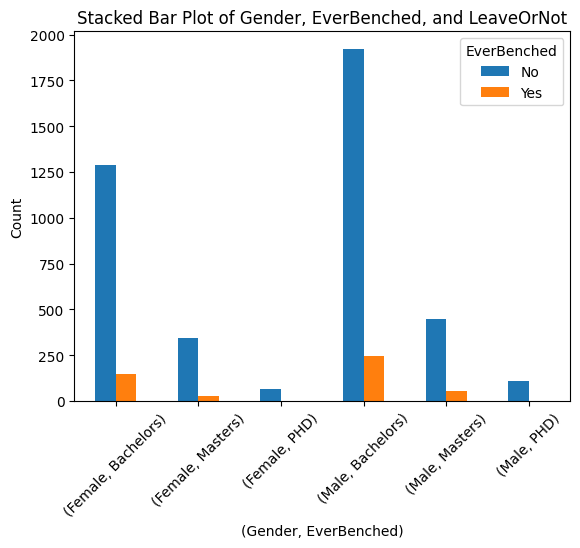

In [41]:
x.plot(kind='bar')
plt.title('Stacked Bar Plot of Gender, EverBenched, and LeaveOrNot')
plt.xlabel('(Gender, EverBenched)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
le=LabelEncoder()
data["Education"]=le.fit_transform(data["Education"])
data["City"]=le.fit_transform(data["City"])
data["Gender"]=le.fit_transform(data["Gender"])
data["EverBenched"]=le.fit_transform(data["EverBenched"])
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [45]:
x=data.drop(columns='LeaveOrNot')
y=data.LeaveOrNot
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25) 

In [46]:
model_svm = SVC(kernel='linear',random_state=0)
model_svm.fit(Xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [47]:
y_pred = model_svm.predict(Xtest)
conf_matrix_svm = confusion_matrix(ytest,y_pred)
print(conf_matrix_svm)

[[659 113]
 [243 149]]


In [49]:
accuracy = accuracy_score(ytest,y_pred)
print(accuracy)

0.6941580756013745


In [50]:
classification_rep_svm = classification_report(ytest, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       772
           1       0.57      0.38      0.46       392

    accuracy                           0.69      1164
   macro avg       0.65      0.62      0.62      1164
weighted avg       0.68      0.69      0.68      1164

